**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\diabetes_project.csv")

**Creating a Copy of the dataset**

In [3]:
df_original = df.copy()

**Checking the Dataset**

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Cleaning**

In [9]:
#Removing Zeroes from Those Attrubites where its not practical
cols_with_zero_issue = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_issue:
    df[col] = df[col].replace(0, df[col].median())

In [10]:
print("\nZero values AFTER cleaning:\n")
for col in cols_with_zero_issue:
    print(f"{col}: {(df[col] == 0).sum()}")


Zero values AFTER cleaning:

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


**Checking For Outliers**

In [11]:
cols_to_treat = [col for col in df.columns 
                 if col not in ["Age", "DiabetesPedigreeFunction", "Outcome"]]

print("\nOutliers BEFORE capping:\n")

for col in cols_to_treat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Outliers BEFORE capping:

Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 35 outliers
Insulin: 49 outliers
BMI: 8 outliers


**Dealing with the Outliers**

In [12]:
for col in cols_to_treat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower, upper)

In [13]:
print("\nOutliers AFTER capping:\n")

for col in cols_to_treat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Outliers AFTER capping:

Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 0 outliers
BMI: 0 outliers


**Comparing the New Cleaned Dataset with the old**

In [14]:
print("BEFORE Cleaning:\n")
print(df_original.describe())

print("\nAFTER Cleaning:\n")
print(df.describe())

BEFORE Cleaning:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

**Visual Representation of the Dataset after dealing with the Outliers**

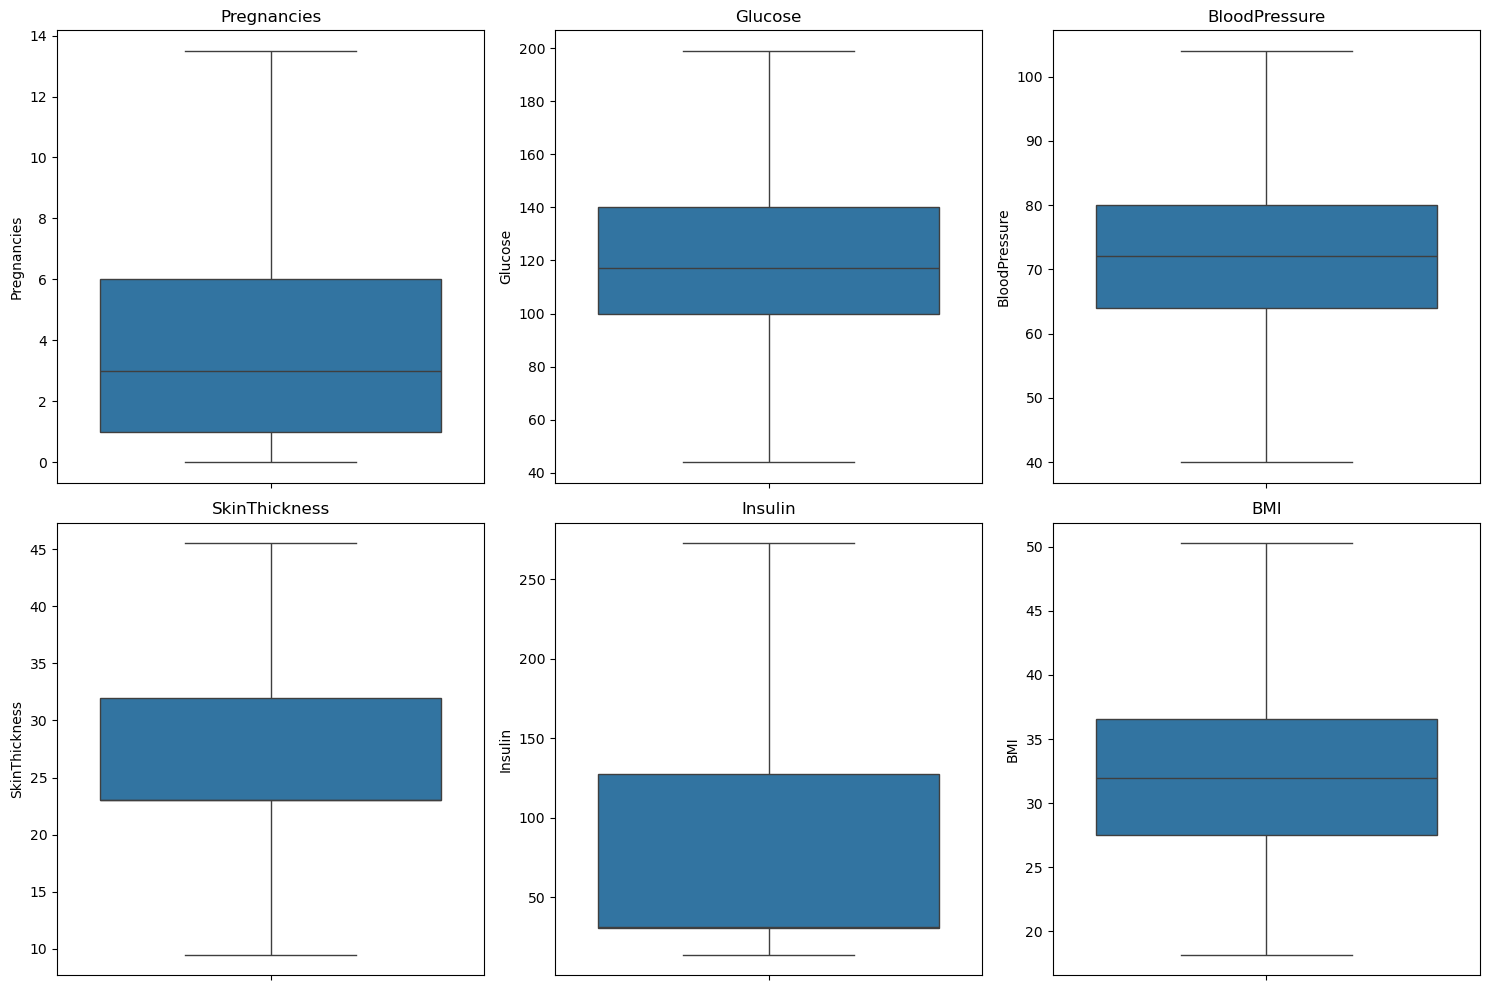

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols_to_plot = cols_to_treat   

n_cols = 3  
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Model Training**

In [16]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring=["recall", "precision", "f1", "roc_auc"]
    )
    
    results[name] = {
        "Recall": cv_results["test_recall"].mean(),
        "Precision": cv_results["test_precision"].mean(),
        "F1": cv_results["test_f1"].mean(),
        "ROC_AUC": cv_results["test_roc_auc"].mean()
    }

pd.DataFrame(results).T

,Recall,Precision,F1,ROC_AUC
Logistic,0.575083,0.736537,0.642964,0.841196
DecisionTree,0.565227,0.538172,0.549473,0.650114
RandomForest,0.588926,0.695331,0.634677,0.813689
GradientBoosting,0.593909,0.676078,0.627471,0.808459


**Analyzing the Models By the respective Confusion Matrix**

In [19]:
trained_models = {}

for name, model in models.items():
    
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)  
    
    trained_models[name] = pipeline  

<Figure size 640x480 with 0 Axes>

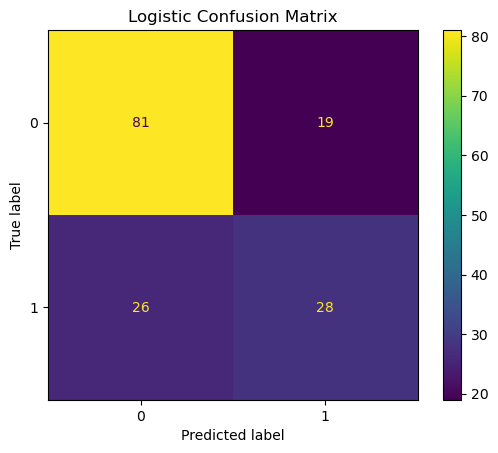

<Figure size 640x480 with 0 Axes>

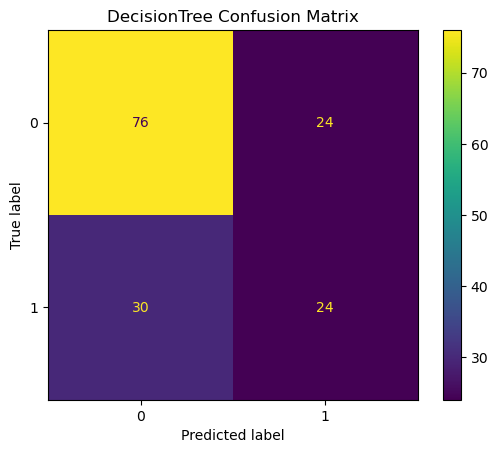

<Figure size 640x480 with 0 Axes>

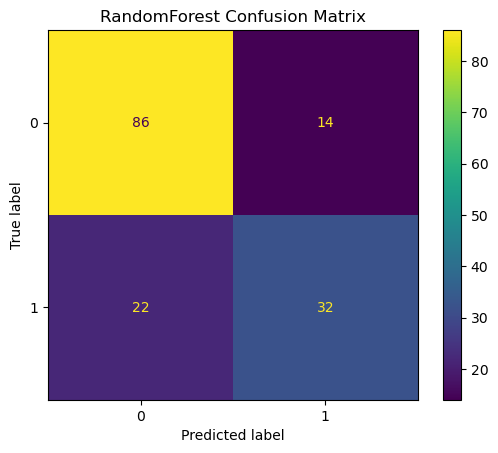

<Figure size 640x480 with 0 Axes>

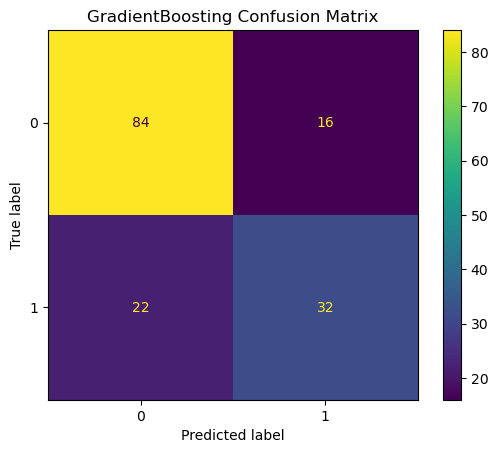

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in trained_models.items():
    
    plt.figure()
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
    
    plt.title(f"{name} Confusion Matrix")
    plt.show()

**Based on All the factors(Recall Value, Precision,ROC-AUC Value 
and The no. of False Negatives we select the best 2 models**

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

for name in ["RandomForest", "GradientBoosting"]:
    
    model = trained_models[name]
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


RandomForest Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

ROC-AUC: 0.8117592592592593

GradientBoosting Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC: 0.8327777777777777


**Checking the stability of the models**

In [23]:
from sklearn.model_selection import cross_val_score

for name in ["RandomForest", "GradientBoosting"]:
    
    model = trained_models[name]
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    
    print(f"{name} Mean CV Recall:", scores.mean())

RandomForest Mean CV Recall: 0.5890365448504984
GradientBoosting Mean CV Recall: 0.5939091915836101


**Since the Mean CV Recall value of the Model (Trained on Gradient Boosting) is close to 0.59 Its clearly the best model for our Project**

**We tune the threshold to 0.4 to check how it differs from the default case**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report


gb_pipeline = trained_models["GradientBoosting"]


gb_prob = gb_pipeline.predict_proba(X_test)[:, 1]


gb_pred_04 = (gb_prob > 0.4).astype(int)

print("Confusion Matrix (Threshold = 0.4):\n")
print(confusion_matrix(y_test, gb_pred_04))

print("\nClassification Report (Threshold = 0.4):\n")
print(classification_report(y_test, gb_pred_04))

Confusion Matrix (Threshold = 0.4):

[[80 20]
 [19 35]]

Classification Report (Threshold = 0.4):

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.64      0.65      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



**We see a better recall value with negligible change in the accuracy and F1 score with the no. of False negatives Dropping to 19**

**Let's find the lowest possible threshold where we can still increase recall and improve the F1-score while keeping the drop in accuracy and precision within acceptable limits**

In [25]:
gb_pred_ = (gb_prob > 0.26).astype(int)

print(confusion_matrix(y_test, gb_pred_))
print(classification_report(y_test, gb_pred_))

[[72 28]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       100
           1       0.62      0.85      0.72        54

    accuracy                           0.77       154
   macro avg       0.76      0.79      0.76       154
weighted avg       0.80      0.77      0.77       154



**Using the Grid search to hypertune the model to check if the new model trained on it perfroms better then the original one**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


gb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GradientBoostingClassifier())
])


params = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.03, 0.05, 0.1],
    "model__max_depth": [3, 4, 5]
}

grid = GridSearchCV(
    gb_pipeline,
    param_grid=params,
    scoring="recall",  
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 300}


**Now Checking Whether the New model performs better then the original**

In [28]:
best_gb = grid.best_estimator_


gb_prob_tuned = best_gb.predict_proba(X_test)[:,1]


gb_pred_tuned = (gb_prob_tuned > 0.3).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, gb_pred_tuned))

print("\nClassification Report:\n")
print(classification_report(y_test, gb_pred_tuned))

print("\nROC-AUC:", roc_auc_score(y_test, gb_prob_tuned))

Confusion Matrix:

[[76 24]
 [17 37]]

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154


ROC-AUC: 0.8127777777777777


**Lets see all the cases for diiferent Threshold values to check if this new model perfroms better**

In [29]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score

gb_prob_tuned = best_gb.predict_proba(X_test)[:,1]

thresholds = np.arange(0.1, 0.6, 0.05)

for t in thresholds:
    y_pred = (gb_prob_tuned > t).astype(int)
    
    print(f"\nThreshold: {t}")
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


Threshold: 0.1
Recall: 0.7962962962962963
Precision: 0.5584415584415584
Accuracy: 0.7077922077922078

Threshold: 0.15000000000000002
Recall: 0.7592592592592593
Precision: 0.5694444444444444
Accuracy: 0.7142857142857143

Threshold: 0.20000000000000004
Recall: 0.7407407407407407
Precision: 0.5970149253731343
Accuracy: 0.7337662337662337

Threshold: 0.25000000000000006
Recall: 0.7222222222222222
Precision: 0.609375
Accuracy: 0.7402597402597403

Threshold: 0.30000000000000004
Recall: 0.6851851851851852
Precision: 0.6065573770491803
Accuracy: 0.7337662337662337

Threshold: 0.3500000000000001
Recall: 0.6296296296296297
Precision: 0.6181818181818182
Accuracy: 0.7337662337662337

Threshold: 0.40000000000000013
Recall: 0.6111111111111112
Precision: 0.6226415094339622
Accuracy: 0.7337662337662337

Threshold: 0.45000000000000007
Recall: 0.5740740740740741
Precision: 0.6458333333333334
Accuracy: 0.7402597402597403

Threshold: 0.5000000000000001
Recall: 0.5555555555555556
Precision: 0.666666666666

**Conclusion**- Gradient Boosting was selected over the other models primarily because it demonstrated greater stability during cross-validation, with more consistent scores compared to Random Forest. After hyperparameter tuning using Grid Search, performance improved slightly in terms of ROC-AUC, but recall remained moderate at the default threshold. Even after lowering the tuned model’s threshold to 0.10, recall increased only to 0.79 — still lower than the 0.85 recall achieved by the original model at a 0.26 threshold. Since our primary objective is minimizing false negatives in a screening context, the original Gradient Boosting model with threshold 0.26 provided the best balance of stability, recall, and overall performance, and was therefore selected as the final model.